## Obtain filtered list of characters

#### Import stuff

In [20]:
import pickle
import classes
import filter_codes
import pandas as pd

#### Scrape characters

In [21]:
# Set up filter
char_filter = classes.CharFilter()
char_filter.winner = True
char_filter.difficulty = 'insane'
char_filter.campaign='majeyal'
char_filter.max_urls = 1000

versions = ['1.7.6', '1.7.5', '1.7.4', '1.7.3', '1.7.2', '1.7.1', '1.7.0']
classes_list = list(filter_codes.class_codes.keys())

# Loop over all classes
for class_ in classes_list:
    print(f"Now starting with {class_}...")
    characters = classes.CharacterList(list())
    
    char_filter.char_class = class_

    # Loop over versions, may want to include this in the CharFilter class in the future
    for version in versions:
        
        char_filter.version = version
        characters += char_filter.get_characters()


    # Save characters to pickle
    with open(f'pickles/{class_}.pkl', 'wb') as fp:
        pickle.dump(characters, fp)


Now starting with Wyrmic...
Extracting character urls...
Now at 0 characters. Extracting characters from page 0...
Now at 21 characters. Extracting characters from page 1...
Page 1 is empty. Ending...
Beginning to extract https://te4.org//characters/135195/tome/21e7cd63-98a7-4120-bf95-d7c1bee8248d...
Something went wrong extracting the skill tree (Probably a non-english character)
'NoneType' object has no attribute 'decompose'
Something went wrong extracting the skill tree (Probably a non-english character)
'NoneType' object has no attribute 'decompose'
Beginning to extract https://te4.org//characters/270742/tome/cec836d3-c65c-4958-843c-0f070ff3ea44...
Something went wrong extracting the skill tree (Probably a non-english character)
'NoneType' object has no attribute 'decompose'
Something went wrong extracting the skill tree (Probably a non-english character)
'NoneType' object has no attribute 'decompose'
Beginning to extract https://te4.org//characters/408/tome/25271343-6e8f-4d13-a8d6

#### Load saved characters

In [28]:
# open a file, where you stored the pickled data
file = open('pickles/Cursed.pkl', 'rb')

# dump information to that file
characters = pickle.load(file)

# close the file
file.close()

#### Clean list of characters

In [29]:
characters.clean_characters()

Threw BumpMans the level 50 Krog Cursed by bits___ away, too many prodigies
Threw Klorocks the level 50 Krog Cursed by Eldakar away, too many prodigies
Threw Big Mad the level 50 Krog Cursed by Aelig_ away, too many prodigies
Threw Jalama the level 50 Krog Cursed by Bunnycat away, too many prodigies
Threw Arhont the level 50 Kruk Yeti Cursed by Arhont away, too many prodigies
Threw Burning Thirst the level 50 Krog Cursed by LifeFF away, too many prodigies
Threw ZORGSMASH the level 50 Krog Cursed by Zargy away, too many prodigies
Threw Artirionix the level 50 Krog Cursed by Artemius away, too many prodigies
Threw SuchBullshit the level 50 Krog Cursed by betacentaur away, too many prodigies
Threw Sakura Slash the level 50 Krog Cursed by Taronimo away, too many prodigies
Threw Revenge the level 50 Krog Cursed by Eldakar away, too many prodigies
Threw wand hater the level 50 Krog Cursed by minmay away, too many prodigies
Threw Chucky the level 50 Halfling Cursed by Jon the Red away, too ma

## Analysis

#### Summary of list

In [30]:
characters.print_summary(num=5)

Races: 	Krog (53.4)%, Cornac (11.7)%, Dwarf (6.8)%, Skeleton (5.8)%, Yeek (4.9)%, 
Prodigies: 	Adept (48.5)%, Superpower (40.8)%, Flexible Combat (39.8)%, I Can Carry The World! (29.1)%, Master of Disasters (9.7)%, 
inscriptions: 	Infusion: Wild (108.7)%, Infusion: Regeneration (75.7)%, Infusion: Healing (65.0)%, Implant: Medical Injector (43.7)%, Infusion: Movement (42.7)%, 


#### Races

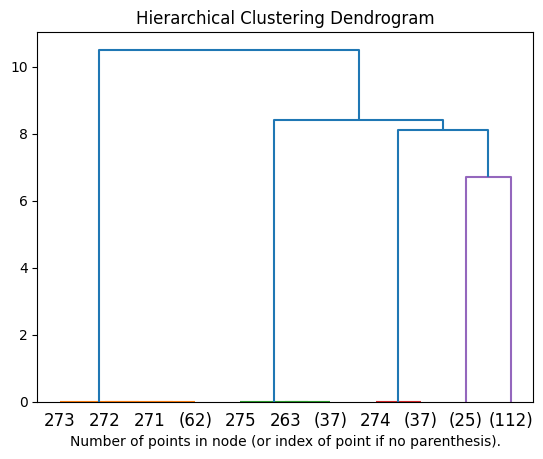

Index(['Kruk Ghoul', 'Thalore', 'Yeek', 'Prismatic Golem', 'Orc', 'Cornac',
       'Krog', 'Doomelf', 'Kruk Yeti', 'Drem', 'Cursed Gnome', 'Hulk',
       'Whitehoof', 'Ghoul', 'Ogre', 'Skeleton', 'Shalore', 'Dwarf', 'Higher',
       'Halfling'],
      dtype='object')

In [173]:
characters.print_dendrogram("race")
df = characters.get_encoded_feature_df("race")
df.columns



#### Prodigies

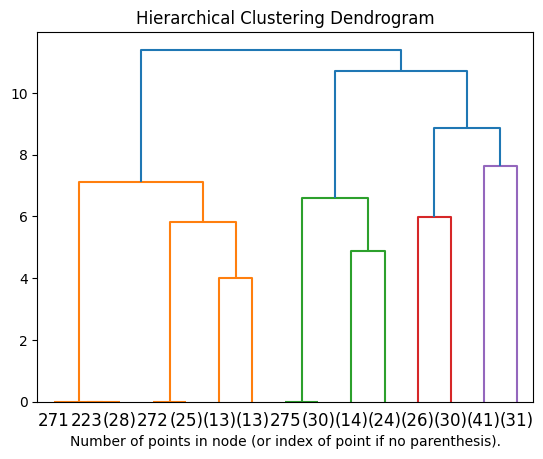

		 Prodigy 1 			 Prodigy 2
Cluster 1 	 Aether Permeation
Cluster 2 	 Ethereal Form
Cluster 3 	 #LIGHT_STEEL_BLUE#High Thaumaturgist (Class Evolution)
Cluster 4 	 Arcane Amplification Drone
Cluster 5 	 Adept 	 #LIGHT_STEEL_BLUE#Technomancer (Class Evolution)


Elemental Surge                                           0.048780
Ethereal Form                                             0.000000
Cauterize                                                 0.121951
Corrupted Shell                                           0.048780
Draconic Will                                             0.024390
#LIGHT_STEEL_BLUE#High Thaumaturgist (Class Evolution)    0.000000
Windtouched Speed                                         0.048780
Swift Hands                                               0.024390
Windblade                                                 0.024390
Arcane Amplification Drone                                0.000000
Unbreakable Will                                          0.000000
Adept                                                     0.682927
Aether Permeation                                         0.000000
#LIGHT_STEEL_BLUE#Technomancer (Class Evolution)          0.682927
Master of Disasters                                       0.09

In [22]:
characters.print_dendrogram("prodigies")
means, closest = characters.get_cluster_centers_and_closest_observations(features='prodigies', num_clusters=5)

def get_prodigies(series):
    
    prodigies = list()
    
    for prodigy, value in series.items():
        if value == 1:
            prodigies.append(prodigy)
            
    return prodigies

def print_closest_observations(closest_observations):
    
    print('\t\t Prodigy 1 \t\t\t Prodigy 2')
    
    for cluster, closest in enumerate(closest_observations):
        prodigies = get_prodigies(closest)

        prodigies_string = ''
        
        for prodigy in prodigies:
            prodigies_string += f' \t {prodigy}'
        
        print(f"Cluster {cluster+1}{prodigies_string}")
        
print_closest_observations(closest)

model = characters.get_cluster_model(features='prodigies', num_clusters=5)
model.labels_

means[4]


#### Inscriptions

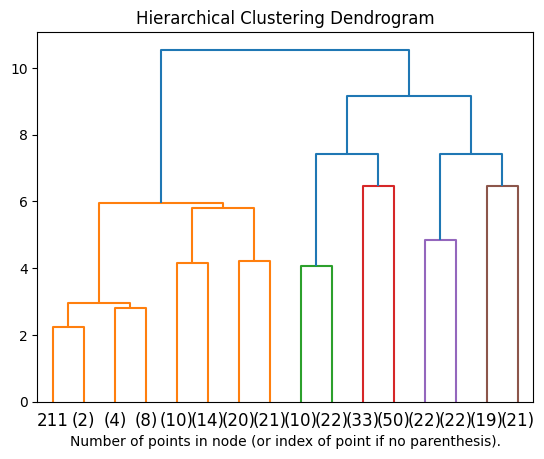

In [15]:
characters.print_dendrogram('inscriptions')

#### Talents

##### Class Talents

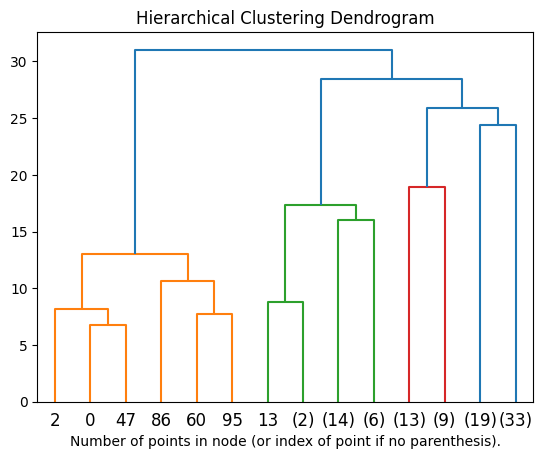

In [31]:
characters.print_dendrogram('class talents')

##### Generic Talents

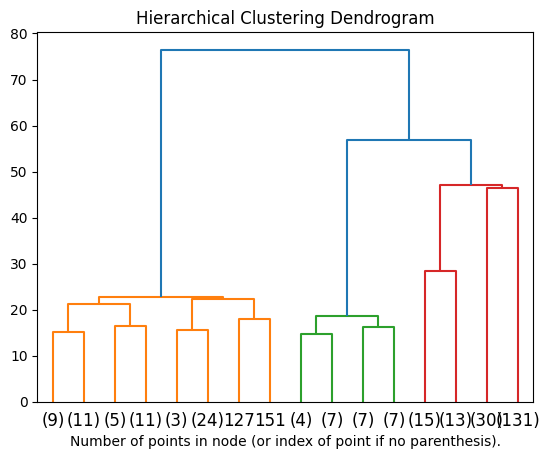

In [13]:
characters.print_dendrogram('generic talents')

#### Total

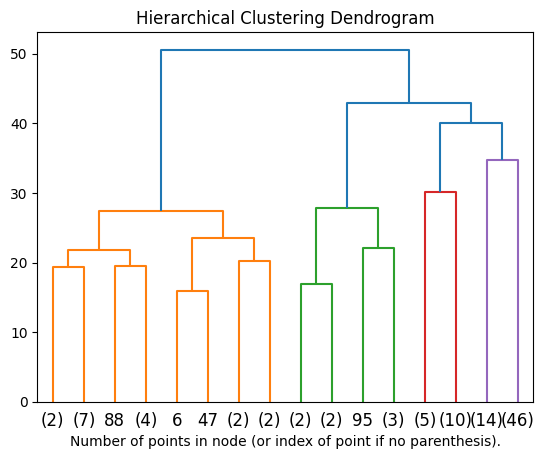

In [33]:
features = ['race', 'class talents', 'generic talents', 'prodigies']
weights = [1,1,1,5]
characters.print_dendrogram(features, weights)

# Export build to excel file with different working sheet for each cluster 

In [35]:
# features = ['race', 'class talents', 'generic talents', 'prodigies']
# weights = [1,1,1,5]
features = 'class talents'
weights = [1]
num_clusters = 3
means, closest = characters.get_cluster_centers_and_closest_observations(features=features, weights = weights, num_clusters=num_clusters)
        
import methods
    
#print_closest_observation(characters, closest[3])
mean_converted = methods.get_converted_mean(characters, means[1])
methods.print_closest_observation(characters, mean_converted)

# Make extra class for a series and add these functions there probably

Prodigies:
Class talents:
	Cursed / Predator
	 	 Predator                      : 	 3.0
	 	 Savage Hunter                 : 	 4.0
	 	 Shrouded Hunter               : 	 2.0
	 	 Mark Prey                     : 	 4.0
	Cursed / Rampage
	 	 Rampage                       : 	 4.0
	 	 Brutality                     : 	 1.0
	 	 Tenacity                      : 	 2.0
	 	 Slam                          : 	 1.0
	Cursed / Strife
	 	 Dominate                      : 	 2.0
	 	 Preternatural Senses          : 	 4.0
	 	 Blindside                     : 	 3.0
	 	 Repel                         : 	 1.0
	Cursed / Endless hunt
	 	 Stalk                         : 	 2.0
	 	 Harass Prey                   : 	 2.0
	 	 Beckon                        : 	 1.0
	 	 Surge                         : 	 3.0
	Cursed / Slaughter
	 	 Slash                         : 	 1.0
	 	 Frenzy                        : 	 2.0
	 	 Reckless Charge               : 	 2.0
	 	 Cleave                        : 	 0.0
	Cursed / Fears
	 	 Instill Fear     

KeyError: 'Wild-gift / Fungus'

In [25]:
len(characters.char_list)
     

72